# Imports

In [11]:
from torchvision import transforms
import datasets as ds

## Dataset class

## Cifar10 - data overview

In [8]:
TRAIN_DIR = ds.TRAIN_DIR
VAL_DIR = ds.VAL_DIR
TRAIN_LABELS = ds.TRAIN_LABELS
VAL_LABELS = ds.VAL_LABELS

CLASS_NAMES = ds.CLASS_NAMES
CLASS_DICT = ds.CLASS_DICT

In [9]:
# Generate Dataset and DataLoader instances for training data
cifar_train = ds.CifarDataset(root_dir = TRAIN_DIR, labels=TRAIN_LABELS, transform=transforms.ToTensor(), class_dict=CLASS_DICT)
cifar_val = ds.CifarDataset(root_dir = VAL_DIR, labels=VAL_LABELS, transform=transforms.ToTensor(), class_dict=CLASS_DICT)

Image size: torch.Size([3, 32, 32])


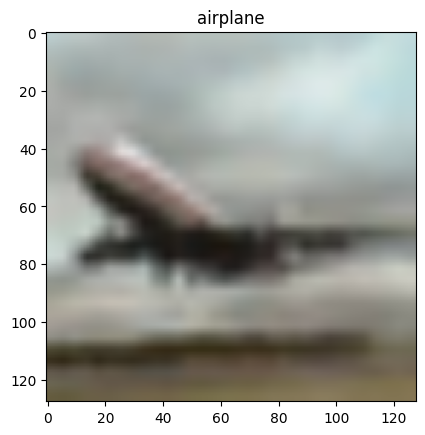

In [10]:
# Images are 32 x 32 pixels. 3 RGB channels.
print("Image size:", cifar_val[0][0].size())
cifar_val.display_image(index=4, resize=128)

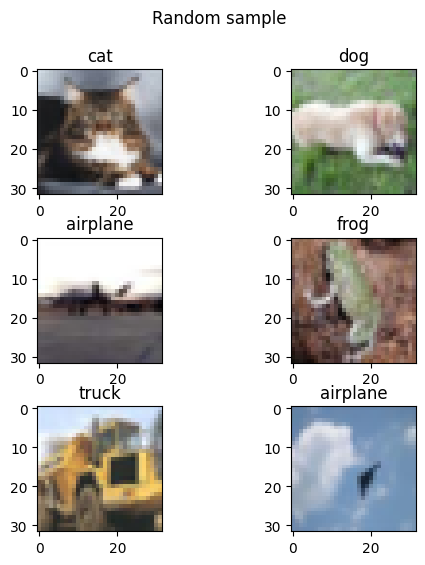

In [9]:
cifar_train.display_sample_images(sample_size=6, resize=32)

## Augmentation techniques

#### Add noise to data

### Standard augmentation techniques

#### Rotation + colorJitter + crop + gaussian noise

In [29]:
img_size = 32
transformer = transforms.Compose([transforms.Pad(padding=(4, 4, 4, 4), fill=0, padding_mode='constant'),
                                  transforms.RandomRotation(degrees=(-25,25)),
                                  transforms.ColorJitter(brightness=0.2, contrast=0.2),
                                  transforms.RandomCrop(img_size),
                                  transforms.ToTensor(),
                                  ds.GaussianNoise(mean=0, std=0.001)])
                                    


cifar_aug1 = ds.CifarDataset(root_dir = TRAIN_DIR, labels=TRAIN_LABELS, transform=transformer, class_dict=CLASS_DICT)

80000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


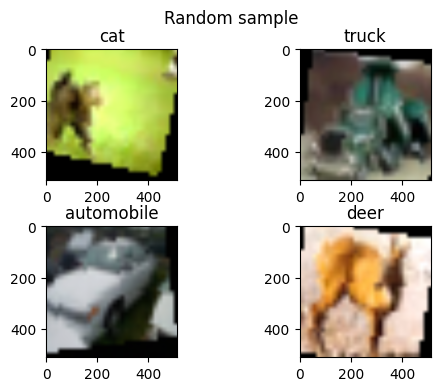

In [30]:
cifar_aug1.display_sample_images(sample_size=4, resize=512)

### Advanced augmentation techniques

#### Mixup

In [33]:
transformer = transforms.Compose([transforms.Pad(padding=(4, 4, 4, 4), fill=0, padding_mode='constant'),
                                  transforms.RandomCrop(img_size),
                                  transforms.RandomHorizontalFlip(p=0.5),
                                  transforms.ToTensor(),
                                  ds.MixUpTransform(alpha=0.7, dataset=cifar_train)])

mixed = ds.CifarDataset(root_dir = TRAIN_DIR, labels=TRAIN_LABELS, transform=transformer, class_dict=CLASS_DICT)

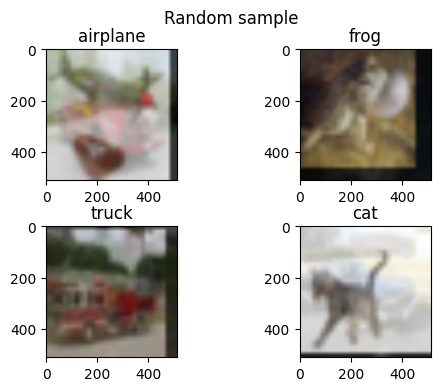

In [42]:
mixed.display_sample_images(sample_size=4, resize=512)

### Cutout

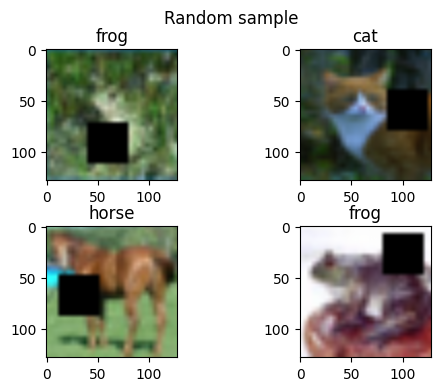

In [ ]:

transformer3 = transforms.Compose([ds.Cutout(size=10, p=1),
                                  transforms.ToTensor()])

cifar_aug4 = ds.CifarDataset(root_dir = TRAIN_DIR, labels=TRAIN_LABELS, 
                          transform=transformer3, class_dict=CLASS_DICT)
cifar_aug4.display_sample_images(sample_size=4)